In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[TINGGAL UPLOAD] Projects 33_Software Industries And Start-Up Salary Data Analysis 2022\Software_Professional_Salaries.csv")
df

,Rating,Company_Name,Job_Title,Salary,Salaries_Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore
...,...,...,...,...,...,...
22769,4.7,Expert Solutions,Web Developer,200000,1,Bangalore
22770,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore
22771,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore
22772,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (22774, 6)


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company_Name       22774 non-null  object 
 2   Job_Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries_Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


,Rating,Salary,Salaries_Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [5]:
# Tampilkan informasi dasar
print("Shape Dataframe Sebelum Cleaning:", df.shape)
print(df.info())

Shape Dataframe Sebelum Cleaning: (22774, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company_Name       22774 non-null  object 
 2   Job_Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries_Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB
None


In [6]:
# Deteksi data duplikat
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

# Deteksi missing values
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

# Deteksi outlier pada kolom Salary menggunakan metode IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Batas bawah Salary:", lower_bound, "Batas atas Salary:", upper_bound)

Jumlah data duplikat: 0
Missing values per kolom:
 Rating               0
Company_Name         0
Job_Title            0
Salary               0
Salaries_Reported    0
Location             0
dtype: int64
Batas bawah Salary: -600000.0 Batas atas Salary: 1800000.0


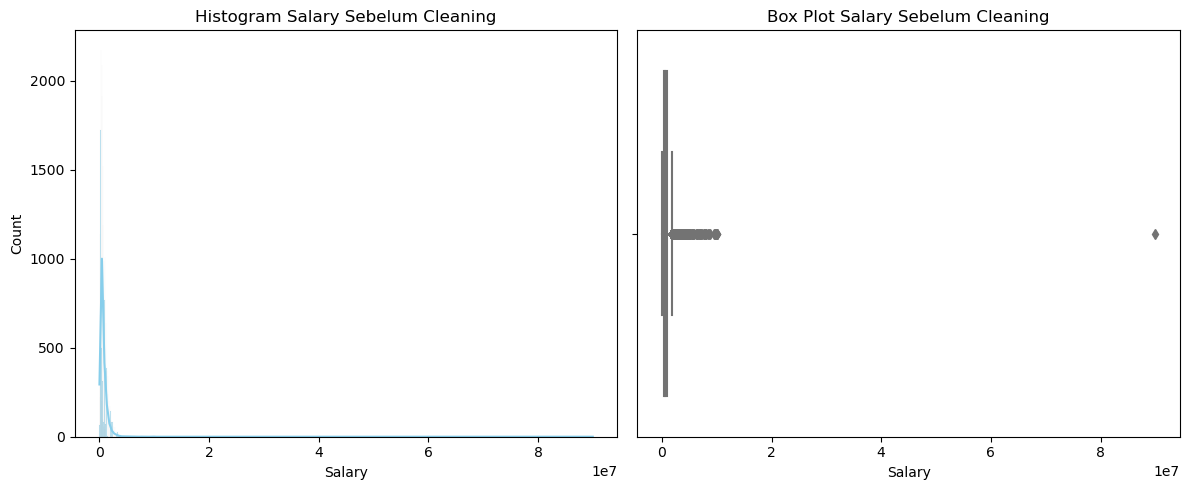

In [7]:
# Visualisasi Histogram dan Box Plot Salary sebelum cleaning
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde=True, color='skyblue')
plt.title('Histogram Salary Sebelum Cleaning')

plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'], color='lightgreen')
plt.title('Box Plot Salary Sebelum Cleaning')
plt.tight_layout()
plt.show()

In [8]:
# --- Proses Data Cleaning ---
# 1. Hapus duplikat
df_cleaned = df.drop_duplicates()

# 2. Hapus missing values
df_cleaned = df_cleaned.dropna()

# 3. Hapus outlier pada Salary
df_cleaned = df_cleaned[(df_cleaned['Salary'] >= lower_bound) & (df_cleaned['Salary'] <= upper_bound)]

print("Shape Dataframe Setelah Cleaning:", df_cleaned.shape)

Shape Dataframe Setelah Cleaning: (21618, 6)


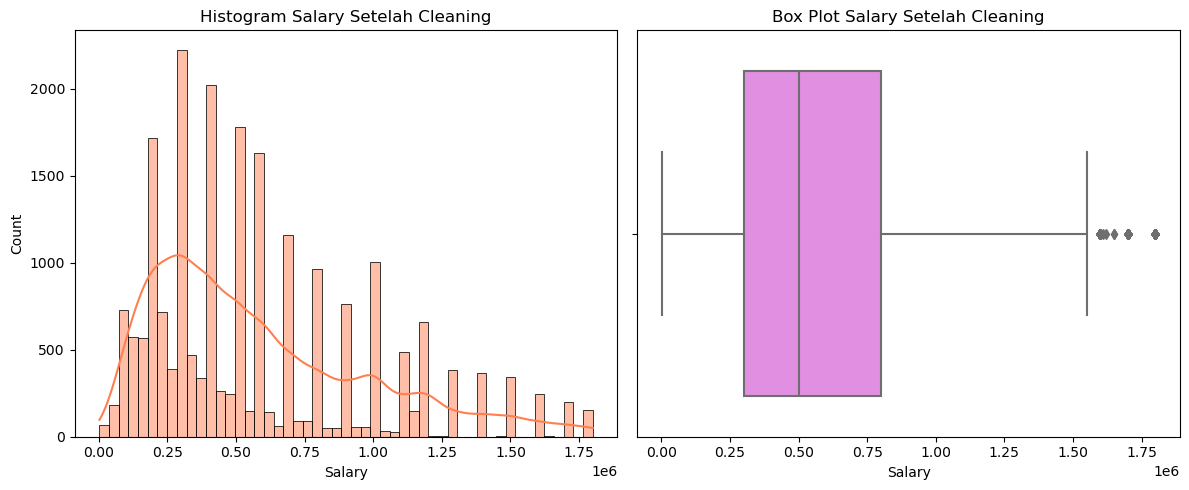

In [9]:
# Visualisasi Histogram dan Box Plot Salary setelah cleaning
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_cleaned['Salary'], kde=True, color='coral')
plt.title('Histogram Salary Setelah Cleaning')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Salary'], color='violet')
plt.title('Box Plot Salary Setelah Cleaning')
plt.tight_layout()
plt.show()

# Menyimpan dataset yang telah dibersihkan ke file CSV baru
df_cleaned.to_csv('Software_Professional_Salaries_Cleaned.csv', index=False)

In [10]:
# Menghitung metrik terukur
total_surveyed = df_cleaned.shape[0]
total_companies = df_cleaned['Company_Name'].nunique()
total_job_positions = df_cleaned['Job_Title'].nunique()
avg_rating = df_cleaned['Rating'].mean()
avg_salary = df_cleaned['Salary'].mean()

print("Total Surveyed:", total_surveyed)
print("Total Companies:", total_companies)
print("Total Job Positions:", total_job_positions)
print("Average Rating Score:", avg_rating)
print("Average Salary:", avg_salary)

Total Surveyed: 21618
Total Companies: 10980
Total Job Positions: 1018
Average Rating Score: 3.9149528170968635
Average Salary: 584474.0812286058


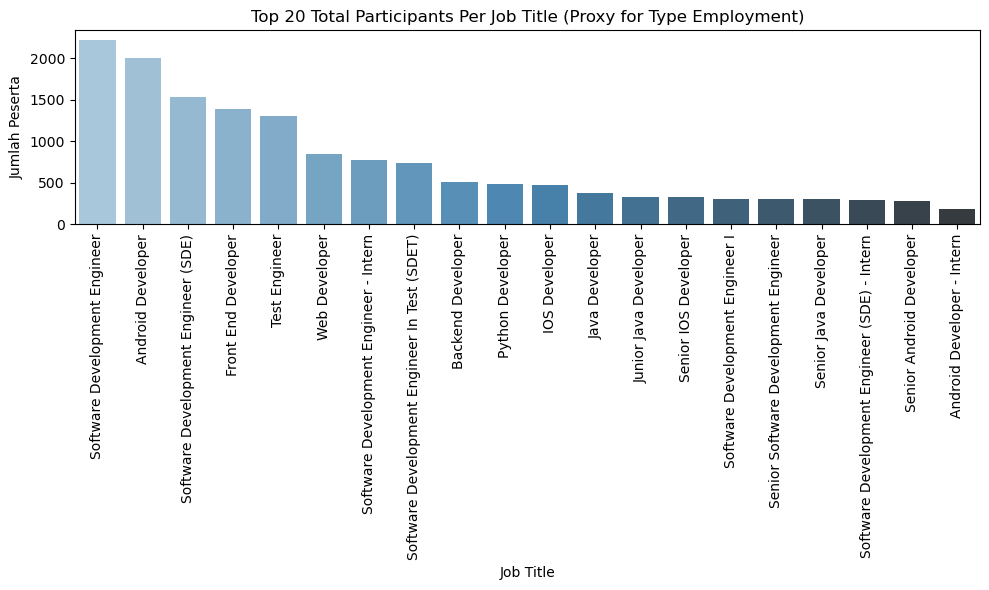

In [11]:
# 1. Bar Chart: Total Participants Per Type Employment (menggunakan Job_Title sebagai proxy)
participants_per_job = df_cleaned['Job_Title'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=participants_per_job.index, y=participants_per_job.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top 20 Total Participants Per Job Title (Proxy for Type Employment)')
plt.xlabel('Job Title')
plt.ylabel('Jumlah Peserta')
plt.tight_layout()
plt.show()

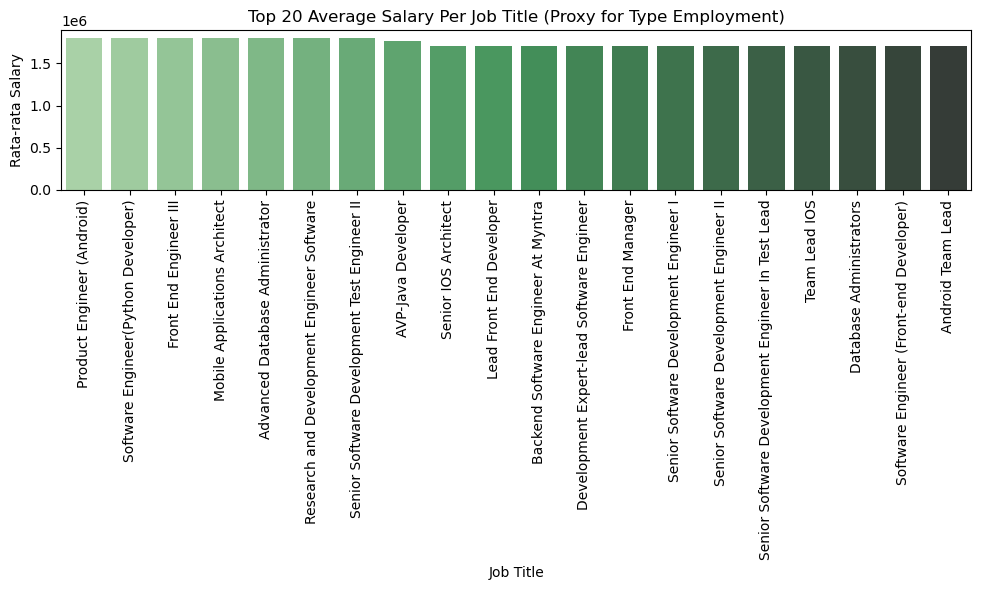

In [12]:
# 2. Bar Chart: Average Salary Per Type Employment (menggunakan Job_Title sebagai proxy)
avg_salary_per_job = df_cleaned.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_per_job.index, y=avg_salary_per_job.values, palette='Greens_d')
plt.xticks(rotation=90)
plt.title('Top 20 Average Salary Per Job Title (Proxy for Type Employment)')
plt.xlabel('Job Title')
plt.ylabel('Rata-rata Salary')
plt.tight_layout()
plt.show()

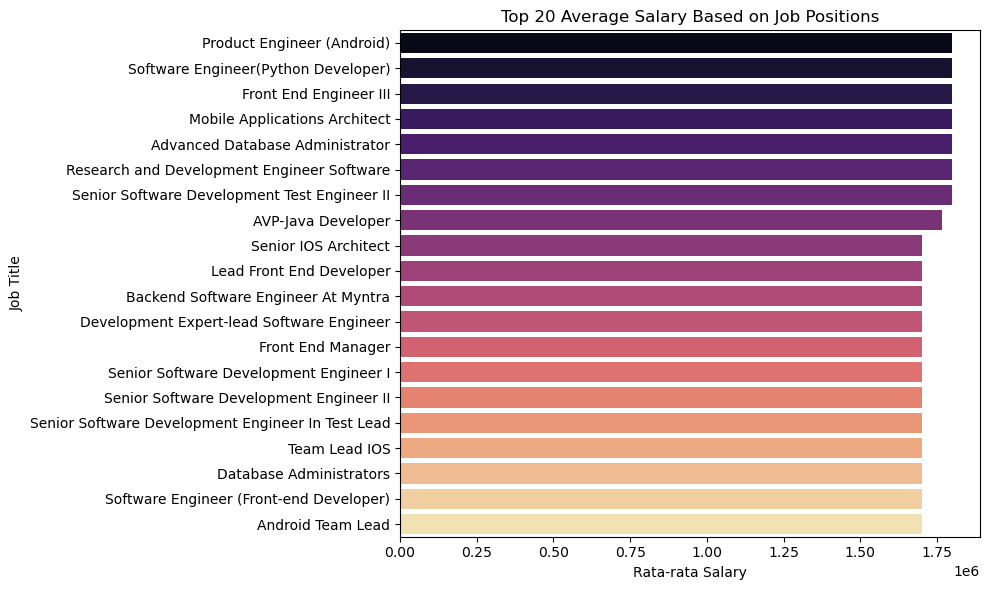

In [13]:
# 3. Horizontal Bar Chart: Average Salary Based on Job Positions (Top 20)
avg_salary_job = df_cleaned.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index, palette='magma')
plt.title('Top 20 Average Salary Based on Job Positions')
plt.xlabel('Rata-rata Salary')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

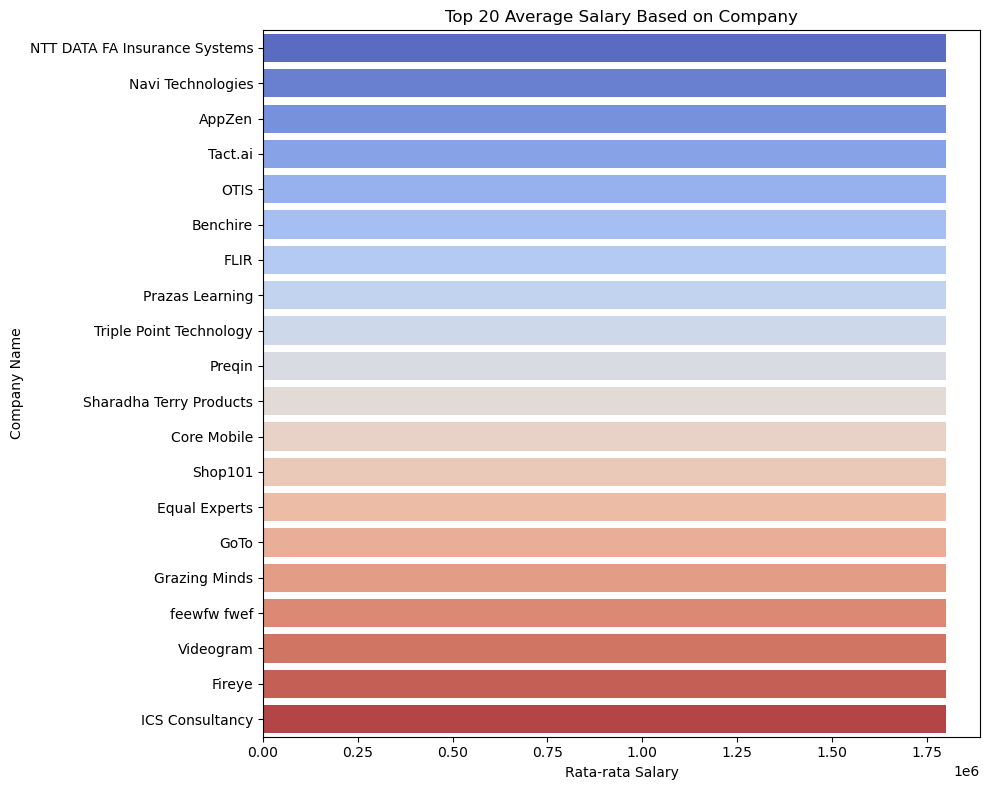

In [14]:
# 4. Horizontal Bar Chart: Average Salary Based on Company (Top 20)
avg_salary_company = df_cleaned.groupby('Company_Name')['Salary'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=avg_salary_company.values, y=avg_salary_company.index, palette='coolwarm')
plt.title('Top 20 Average Salary Based on Company')
plt.xlabel('Rata-rata Salary')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

In [15]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Membuat figure dengan Plotly Express untuk dashboard
# fig_hist = px.histogram(df_cleaned, x='Salary', nbins=50, title='Histogram Salary')
# fig_box = px.box(df_cleaned, x='Salary', title='Box Plot Salary')

# # Menyiapkan tampilan metrik
# metrics_layout = html.Div([
#     html.H3("Metrik Utama"),
#     html.P(f"Total Surveyed: {total_surveyed}"),
#     html.P(f"Total Companies: {total_companies}"),
#     html.P(f"Total Job Positions: {total_job_positions}"),
#     html.P(f"Average Rating Score: {avg_rating:.2f}"),
#     html.P(f"Average Salary: {avg_salary:.2f}")
# ])

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)
# app.layout = html.Div([
#     html.H1("Dashboard Analisis Software Professional Salaries"),
#     metrics_layout,
#     dcc.Graph(figure=fig_hist),
#     dcc.Graph(figure=fig_box)
#     # Anda dapat menambahkan grafik lain sesuai kebutuhan
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
